In [69]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [76]:
# Parameters
num_consumers = 100   # Number of consumers
num_producers = 100   # Number of producers
num_transactions = 10000    # Number of iterations
num_producer_chances_to_sell = 1000    # Effectively the volume of consumer demand

# Consumers: Each consumer has a base price they're willing to pay
# Let's assume the willingness to pay is normally distributed around $50 with a std deviation of 10
consumers_base_prices = np.random.normal(loc=50, scale=10, size=num_consumers)

# Producers: Each producer has a base price at which they're willing to sell
# Assume the asking price is normally distributed around $50 with a std deviation of 10
producers_base_prices = np.random.normal(loc=50, scale=10, size=num_producers)

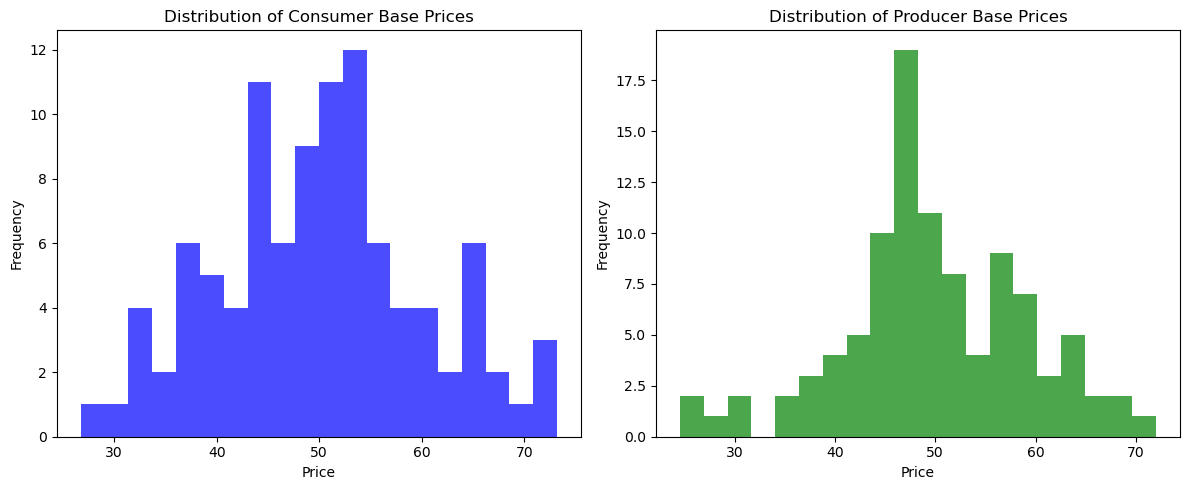

In [77]:
# Histogram of base prices
plt.figure(figsize=(12, 5))

# Consumer prices histogram
plt.subplot(1, 2, 1)
plt.hist(consumers_base_prices, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Consumer Base Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Producer prices histogram
plt.subplot(1, 2, 2)
plt.hist(producers_base_prices, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Producer Base Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [78]:
print(consumers_base_prices[0:4])

[37.34097837 61.33624575 33.50671472 52.65120857]


In [79]:

# To store successful transaction prices
transaction_prices = []

# Simulate over 10000 iterations
for _ in range(num_transactions):
    # Randomly pick a consumer and producer
    producer_id = random.randint(0, num_producers - 1)
    producer_price = producers_base_prices[producer_id] #+ np.random.normal(0, 5)

    # Allow the producer to sell to 10 randomly chosen consumers
    for _ in range(num_producer_chances_to_sell):
        consumer_id = random.randint(0, num_consumers - 1)
    
        # Consumer's dynamic buying price: base price + some small fluctuation
        consumer_price = consumers_base_prices[consumer_id] #+ np.random.normal(0, 5)
        
        # Producer's dynamic asking price: base price + some small fluctuation
        
        # Check if the transaction happens (if consumer is willing to pay at least the asking price)
        if consumer_price >= producer_price:
            transaction_prices.append(producer_price)
            break

print(transaction_prices)

[67.53687559954707, 50.69163246122793, 45.135700101453224, 52.627460440858634, 50.34789241428459, 50.25446976973557, 56.84792828107011, 24.544494953830885, 62.618183544864166, 54.65482256040045, 47.025017803585484, 41.44469176498386, 45.35648871129908, 62.618183544864166, 64.8276516798562, 24.544494953830885, 36.93630079020953, 29.82673073490625, 66.96932119274477, 63.03880435317808, 59.21485962751091, 54.65482256040045, 36.93630079020953, 67.53687559954707, 64.8276516798562, 46.8278384469238, 53.13543063348161, 50.69163246122793, 53.13543063348161, 57.75468257015088, 46.062199084182105, 58.23755496272186, 51.65355276387945, 44.7015484391535, 55.77973319985304, 43.47762204999249, 46.941694276677175, 49.96585506872484, 39.81827712570708, 46.659260557957346, 26.826865935421665, 45.35648871129908, 47.73944612552796, 43.695151793894176, 60.45403908006338, 50.69163246122793, 37.07761536269413, 51.65355276387945, 55.966055175490006, 41.44469176498386, 55.966055175490006, 48.21101432679425, 3

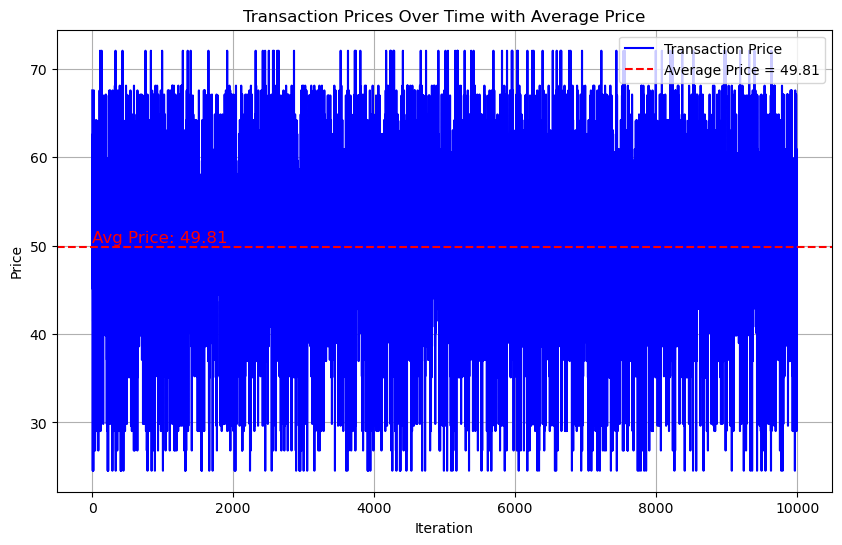

In [80]:
# Calculate the average transaction price
average_price = np.mean(transaction_prices)

# Plotting the transaction prices over time
plt.figure(figsize=(10, 6))
plt.plot(transaction_prices, label='Transaction Price', color='blue')
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average Price = {average_price:.2f}')

# Annotate the average price on the plot
plt.text(0, average_price + 0.5, f'Avg Price: {average_price:.2f}', color='red', fontsize=12)

# Plot labels and legend
plt.title('Transaction Prices Over Time with Average Price')
plt.xlabel('Iteration')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [75]:
print(len(transaction_prices))

92467


In [57]:
print(num_transactions)

10000


In [58]:
print(len(transaction_prices) / num_transactions)

0.9272
